# Directing Customer to Subscription Through Financial App Behaviour Analysis

# Goal of the project:

### A company launch their android  and iOS base app to grow  their business. But there is a problem that, how to promote this app and offer who really want to utilize it. So for that company decided to give free trial to each and every customer for 24 hours and collect data from the customers. In this scenario some customer purchase the app and someone not. According to the company want to give special offer to the customer who are not interested to buy without offer and grow their business.


### This is a classification problem

# Import essential libraries

In [1]:
import numpy as np # for numerical calculations and operations
import pandas as pd # for data analysis and manipulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser  # convert time in date time datatype

# Import  dataset and Explore

In [2]:
company_df = pd. read_csv("Company_subscription.csv")
company_df.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51,3,02:00:00,23,15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00,6,01:00:00,24,13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09,1,19:00:00,23,3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46,4,16:00:00,28,40,0,0,1,2013-07-05 16:11:49,0
4,51549,2013-02-26 18:50:48,1,18:00:00,31,32,0,0,1,2013-02-26 18:56:37,1


In [3]:
kri = company_df.enrolled.values
count_1=0
for i in kri:
    if i == 1:
        count_1 = count_1 +1
count_1

31074

In [4]:
kri = company_df.enrolled.values
count_1=0
for i in kri:
    if i == 0:
        count_1 = count_1 +1
count_1

18926

In [5]:
company_df.shape

(50000, 11)

In [6]:
company_df

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51,3,02:00:00,23,15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00,6,01:00:00,24,13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09,1,19:00:00,23,3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46,4,16:00:00,28,40,0,0,1,2013-07-05 16:11:49,0
4,51549,2013-02-26 18:50:48,1,18:00:00,31,32,0,0,1,2013-02-26 18:56:37,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17,3,13:00:00,32,13,0,0,1,2013-05-09 13:47:52,0
49996,169179,2013-04-09 00:05:17,1,00:00:00,35,4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51,2,22:00:00,39,25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04,6,12:00:00,27,26,0,0,1,2013-04-28 12:35:38,0


In [7]:
company_df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [8]:
company_df.info() # Brief information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   numscreens            50000 non-null  int64 
 6   minigame              50000 non-null  int64 
 7   used_premium_feature  50000 non-null  int64 
 8   enrolled              50000 non-null  int64 
 9   enrolled_date         31074 non-null  object
 10  liked                 50000 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.2+ MB


In [9]:
company_df.describe() # it gives the numeric distribution of the dataset

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
company_df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked'],
      dtype='object')

In [11]:
# Get the unique value of each columns and it's length
features = company_df.columns
for i in features:
    print("Unique value of {}\n{}\nlen is {} \n ...........\n".
         format(i, company_df[i].unique(), len(company_df[i].unique())))

Unique value of user
[235136 333588 254414 ... 302367 324905  27047]
len is 49874 
 ...........

Unique value of first_open
['2012-12-27 02:14:51' '2012-12-02 01:16:00' '2013-03-19 19:19:09' ...
 '2013-02-20 22:41:51' '2013-04-28 12:33:04' '2012-12-14 01:22:44']
len is 49407 
 ...........

Unique value of dayofweek
[3 6 1 4 2 0 5]
len is 7 
 ...........

Unique value of hour
['02:00:00' '01:00:00' '19:00:00' '16:00:00' '18:00:00' '09:00:00'
 '03:00:00' '14:00:00' '04:00:00' '11:00:00' '06:00:00' '21:00:00'
 '05:00:00' '17:00:00' '20:00:00' '00:00:00' '22:00:00' '10:00:00'
 '08:00:00' '15:00:00' '13:00:00' '23:00:00' '12:00:00' '07:00:00']
len is 24 
 ...........

Unique value of age
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100

In [12]:
company_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [13]:
# how data convert string to int

company_df['hour'] = company_df.hour.str.slice(0,2).astype(int)
type(company_df['hour'])

pandas.core.series.Series

In [14]:
company_df['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [15]:
# get datatype of each columns
company_df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [16]:
company_df.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'numscreens',
       'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date',
       'liked'],
      dtype='object')

# Data visualization

## Countplot of enrolled

<AxesSubplot:ylabel='count'>

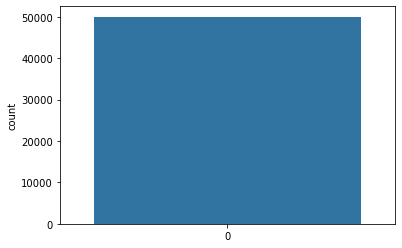

In [17]:
# show countplot of 'enrolled' feature
sns.countplot(company_df.enrolled)

In [18]:
# value enrolled and not enrolled customers
print("Not enrolled users = ", (company_df.enrolled == 0).sum(), "out of 50000")
print("Enrolled users = ", 50000-(company_df.enrolled == 0).sum(), "out of 50000")

Not enrolled users =  18926 out of 50000
Enrolled users =  31074 out of 50000


In [19]:
for i,j in enumerate(features):
    print(i,j)

0 user
1 first_open
2 dayofweek
3 hour
4 age
5 numscreens
6 minigame
7 used_premium_feature
8 enrolled
9 enrolled_date
10 liked


In [20]:
# Parsing object data into date time format

company_df['first_open'] = [parser.parse(i) for i in company_df['first_open']]

In [21]:
company_df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date                   object
liked                            int64
dtype: object

In [22]:
company_df['enrolled_date'] = [parser.parse(i) if isinstance(i, str) else i for i in company_df['enrolled_date']]

In [23]:
company_df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [24]:
company_df['time_to_enrolled'] = (company_df.enrolled_date - company_df.first_open).astype('timedelta64')

In [25]:
company_df['time_to_enrolled']

0                 NaN
1                 NaN
2                 NaN
3        1.830000e+11
4        3.490000e+11
             ...     
49995    9.500000e+10
49996             NaN
49997             NaN
49998    1.540000e+11
49999             NaN
Name: time_to_enrolled, Length: 50000, dtype: float64

(array([2.8195e+04, 1.0320e+03, 5.6600e+02, 4.2600e+02, 2.8800e+02,
        1.7900e+02, 1.6500e+02, 9.7000e+01, 1.0400e+02, 2.2000e+01]),
 array([0.00000000e+00, 1.95648730e+15, 3.91297460e+15, 5.86946190e+15,
        7.82594920e+15, 9.78243650e+15, 1.17389238e+16, 1.36954111e+16,
        1.56518984e+16, 1.76083857e+16, 1.95648730e+16]),
 <BarContainer object of 10 artists>)

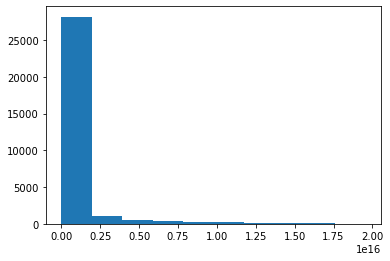

In [26]:
# plot  histogram

plt.hist(company_df['time_to_enrolled'].dropna())

In [27]:
company_df.head()

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51,3,2,23,15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00,6,1,24,13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09,1,19,23,3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46,4,16,28,40,0,0,1,2013-07-05 16:11:49,0,1.830000e+11
4,51549,2013-02-26 18:50:48,1,18,31,32,0,0,1,2013-02-26 18:56:37,1,3.490000e+11


In [28]:
company_df.drop(columns = ['time_to_enrolled', 'enrolled_date', 'first_open'], inplace = True)

In [29]:
company_df

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,15,0,0,0,0
1,333588,6,1,24,13,0,0,0,0
2,254414,1,19,23,3,0,1,0,1
3,234192,4,16,28,40,0,0,1,0
4,51549,1,18,31,32,0,0,1,1
...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,1,0
49996,169179,1,0,35,4,0,1,0,0
49997,302367,2,22,39,25,0,0,0,0
49998,324905,6,12,27,26,0,0,1,0


## Heatmap with correlation matrix of new company_df

<AxesSubplot:>

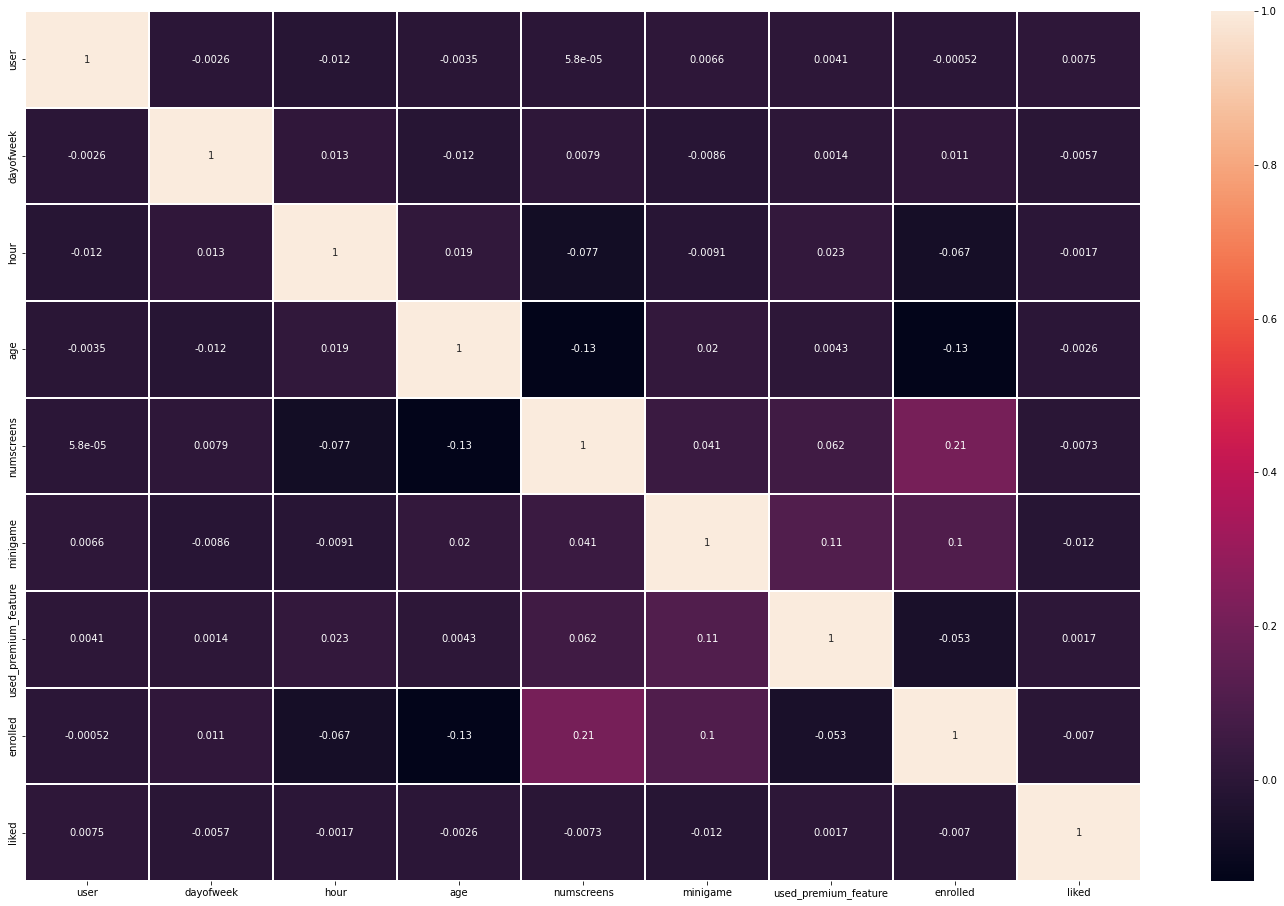

In [30]:
# Heatmap with correlation of new company_df

plt.figure(figsize = (25, 16))
sns.heatmap(company_df.corr(), annot = True, linewidth = 2)

In [31]:
company_df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked'],
      dtype='object')

In [32]:
company_df.drop(columns = 'user', inplace = True)

# DATA PREPROCESSING

## Split Dataset into train and test

In [33]:
target = company_df['enrolled']
X = company_df.drop(columns = 'enrolled')

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 43)

In [35]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (40000, 7)
Shape of X_test :  (10000, 7)
Shape of y_train :  (40000,)
Shape of y_test :  (10000,)


In [36]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
30415,2,3,20,7,0,0,0
21710,6,12,26,26,0,0,0
13743,5,15,21,2,0,0,0
10137,4,21,19,13,0,0,0
14471,4,14,51,22,0,0,0
...,...,...,...,...,...,...,...
25233,6,19,25,8,0,1,0
18448,0,1,32,18,0,0,0
40753,3,20,35,46,0,0,0
19776,4,15,28,3,0,1,0


## Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [38]:
X_test_sc = pd.DataFrame(X_test_sc)
X_test_sc

,0,1,2,3,4,5,6
0,1.464943,-0.878088,-0.713073,-0.644537,-0.347102,-0.455933,-0.444366
1,1.464943,-0.072071,-0.157569,-0.898290,-0.347102,2.193302,2.250396
2,0.479229,0.465273,1.231192,-0.073593,-0.347102,2.193302,-0.444366
3,-1.492198,-1.415433,-0.250153,0.560789,-0.347102,-0.455933,2.250396
4,0.479229,0.599609,-1.361161,-0.454223,-0.347102,-0.455933,2.250396
...,...,...,...,...,...,...,...
9995,-1.492198,-1.684105,0.120183,0.624228,-0.347102,2.193302,-0.444366
9996,-0.506484,-1.684105,-0.805657,2.654252,-0.347102,-0.455933,-0.444366
9997,0.972086,-1.012424,-0.898241,-0.010155,-0.347102,2.193302,-0.444366
9998,1.464943,0.868282,2.064448,-0.644537,-0.347102,-0.455933,-0.444366


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print(dt_model.score(X_test, y_test)*100)

57.76


In [40]:
# train with Standerd Scaling dataset

dt_model2 = DecisionTreeClassifier(criterion = 'entropy')
dt_model2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_model2.predict(X_test_sc)

print(100*dt_model2.score(X_test, y_test))

56.49999999999999


/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


# K-NN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1 = KNeighborsClassifier(n_neighbors = 5)
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_test)

print(knn_model1.score(X_test, y_test)*100)

61.029999999999994


In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn_model_sc = KNeighborsClassifier(n_neighbors = 5)
knn_model_sc.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_model_sc.predict(X_test_sc)

print(100*knn_model_sc.score(X_test, y_test))

/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


61.46


# Naive Bayes

In [43]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_model = nb_model.predict(X_test)

print(100*nb_model.score(X_test, y_test))

63.849999999999994


In [44]:
# feature scaled data

from sklearn.naive_bayes import GaussianNB
nb_model_sc = GaussianNB()
nb_model_sc.fit(X_train_sc, y_train)
y_pred_model_sc = nb_model_sc.predict(X_test_sc)

nb_model_sc.score(X_test, y_test)*100

/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


55.87

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 535)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_model.score(X_test, y_test)*100

62.839999999999996

In [46]:
# Featured Scaled Data

from sklearn.ensemble import RandomForestClassifier
rf_model_sc = RandomForestClassifier(n_estimators = 30, criterion = 'gini', random_state = 3553)
rf_model_sc.fit(X_train_sc, y_train)
y_pred_sc_rffs = rf_model_sc.predict(X_test)

rf_model_sc.score(X_test, y_test)*100

/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


58.46

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

lr_model.score(X_test, y_test)*100

65.92

In [48]:
# Featured Scaled Data

from sklearn.linear_model import LogisticRegression
lr_model_sc = LogisticRegression()
lr_model_sc.fit(X_train_sc, y_train)
y_pred_sc = lr_model.predict(X_test_sc)

lr_model_sc.score(X_test, y_test)*100

/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


63.49

# Support Vector Classifier

In [49]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

svc_model.score(X_test, y_test)

0.6554

In [50]:
# Featured Scaled Data
from sklearn.svm import SVC
svc_model_sc = SVC()
svc_model_sc.fit(X_train_sc, y_train)
y_pred_sc = svc_model.predict(X_test_sc)

svc_model.score(X_test_sc, y_test)

/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/home/krishnakant/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.4644

## We are using Random Forest Classification with feature scaled data to build model

In [64]:
import pickle

In [65]:
pickle.dump(lr_model, open('model_customer_subscription', 'wb'))

In [66]:
model_pickle_load = pickle.load(open('model_customer_subscription', 'rb'))

In [67]:
y_pred_actual = model_pickle_load.predict(X_test)

In [68]:
y_pred_actual = pd.Series(y_pred_actual)

In [69]:
y_pred_actual

0       1
1       0
2       0
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    0
9999    0
Length: 10000, dtype: int64

In [70]:
y_test

7396     1
29820    0
1987     1
20095    1
32435    1
        ..
159      1
39708    1
15946    0
22235    1
11701    1
Name: enrolled, Length: 10000, dtype: int64

In [71]:
X_test

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
7396,6,6,24,11,0,0,0
29820,6,12,30,7,0,1,1
1987,4,16,45,20,0,1,0
20095,0,2,29,30,0,0,1
32435,4,17,17,14,0,0,1
...,...,...,...,...,...,...,...
159,0,0,33,31,0,1,0
39708,2,0,23,63,0,0,0
15946,5,5,22,21,0,1,0
22235,6,19,54,11,0,0,0


In [72]:
company_df.iloc[3]

dayofweek                4
hour                    16
age                     28
numscreens              40
minigame                 0
used_premium_feature     0
enrolled                 1
liked                    0
Name: 3, dtype: int64

In [73]:
kri = company_df.enrolled.values
s = set()
for i in kri:
    s.add(i)

In [74]:
s

{0, 1}

In [75]:
count_1=0
for i in kri:
    if i == 1:
        count_1 = count_1 +1
count_1

31074

In [76]:
count_1=0
for i in kri:
    if i == 0:
        count_1 = count_1 +1
count_1

18926